In [ ]:
!pip uninstall tensorflow

# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow==2.8 tensorflow==2.8 opencv-python matplotlib protobuf==3.19.1

In [3]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
ipykernel                    6.22.0
ipython                      8.12.0
jax                          0.4.8
jedi 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\goodimages\AC_img100.jpeg
Image not in ext list data\goodimages\AC_img101.jpeg
Image not in ext list data\goodimages\AC_img108.jpeg
Image not in ext list data\goodimages\AC_img109.jpeg
Image not in ext list data\goodimages\AC_img127.jpeg
Image not in ext list data\goodimages\AC_img128.jpeg
Image not in ext list data\goodimages\AC_img129.jpeg
Image not in ext list data\goodimages\AC_img130.jpeg
Image not in ext list data\goodimages\AC_img131.jpeg
Image not in ext list data\goodimages\AC_img134.jpeg
Image not in ext list data\goodimages\AC_img143.jpeg
Image not in ext list data\goodimages\AC_img147.jpeg
Image not in ext list data\goodimages\AC_img156.jpeg
Image not in ext list data\goodimages\AC_img157.jpeg
Image not in ext list data\goodimages\AC_img158.jpeg
Image not in ext list data\goodimages\AC_img159.jpeg
Image not in ext list data\goodimages\AC_img160.jpeg
Image not in ext list data\goodimages\AC_img161.jpeg
Image not in ext list data\goodimages\AC_img16

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 131 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

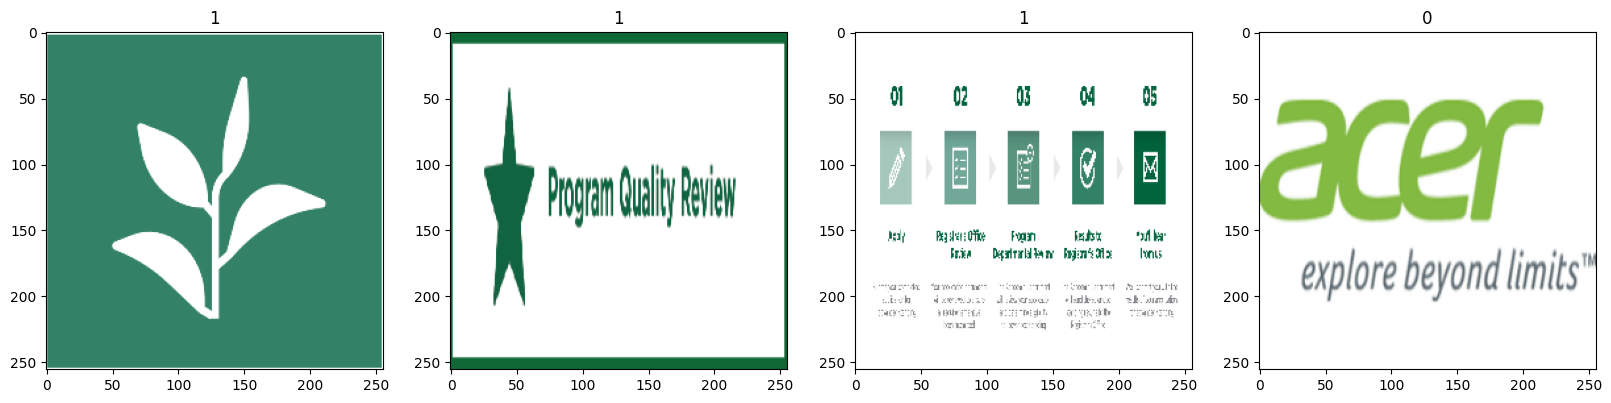

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data.as_numpy_iterator().next()

(array([[[[ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          ...,
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ]],
 
         [[ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          ...,
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ]],
 
         [[ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          ...,
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ],
          [ 38.      , 103.      ,  65.      ]],
 
         ...,
 
         [[ 38.      , 103.      ,  65.      ],
          [ 38.   

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],
 
         [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          ...,
          [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
          [1.0000000e+00, 1.0000000e+

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

3

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 1.1619 - accuracy: 0.5417 - val_loss: 0.7994 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 3s 924ms/step - loss: 0.7544 - accuracy: 0.4583 - val_loss: 0.6865 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 3s 923ms/step - loss: 0.6892 - accuracy: 0.6667 - val_loss: 0.6204 - val_accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 3s 991ms/step - loss: 0.5926 - accuracy: 0.7188 - val_loss: 0.4950 - val_accuracy: 0.9062
Epoch 5/20
3/3 [==============================] - 3s 957ms/step - loss: 0.5366 - accuracy: 0.8438 - val_loss: 0.5533 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 3s 948ms/step - loss: 0.5072 - accuracy: 0.8125 - val_loss: 0.4593 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 3s 931ms/step - loss: 0.3758 - accuracy: 0.9167 - val_loss: 0.3349 - val_accuracy: 0.9062
Epoch 8/20
3/3 [=======

# 8. Plot Performance

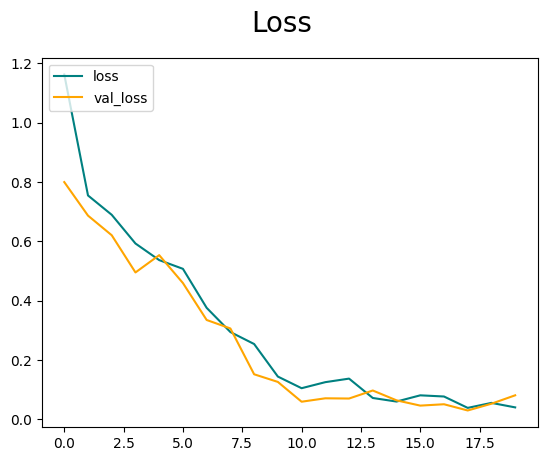

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

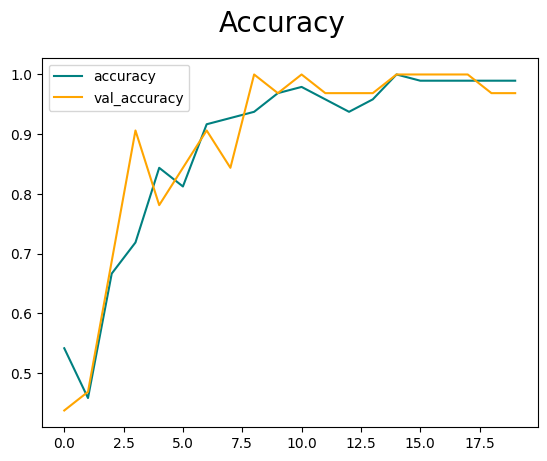

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [38]:
import cv2

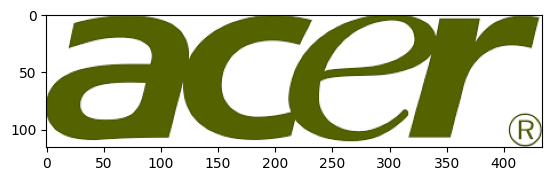

In [47]:
img = cv2.imread('Acer3.png')
plt.imshow(img)
plt.show()

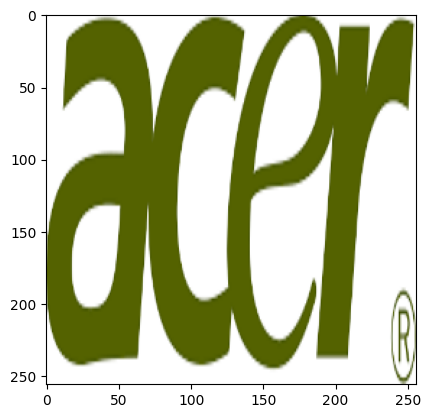

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [50]:
yhat

array([[3.0743909e-06]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Predicted class is GoodLogo')
else:
    print(f'Predicted class is BadLogo(?)')

Predicted class is BadLogo(?)


# 11. Save the Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models','algonquinModel_1.h5'))

In [60]:
new_model = load_model('models/aiclassifier.h5')

In [61]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.965752]], dtype=float32)